In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()

model.summary()

553476096/553467096 [==============================] - 40s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [4]:
from tensorflow.keras.preprocessing.image import load_img

img_dog = load_img('img/dog.jpg', target_size=(224, 224))
img_cat = load_img('img/cat.jpg', target_size=(224, 224))

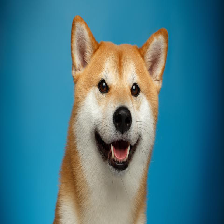

In [5]:
img_dog

In [13]:
from tensorflow.keras.preprocessing.image import img_to_array

arr_cat = img_to_array(img_cat)
arr_dog = img_to_array(img_dog)

In [14]:
arr_dog

array([[[  1.,  61.,  89.],
        [  2.,  63.,  91.],
        [  1.,  65.,  92.],
        ...,
        [  2.,  39.,  65.],
        [  2.,  38.,  62.],
        [  1.,  36.,  58.]],

       [[  1.,  61.,  89.],
        [  2.,  63.,  91.],
        [  1.,  65.,  92.],
        ...,
        [  2.,  39.,  65.],
        [  2.,  38.,  62.],
        [  1.,  36.,  58.]],

       [[  1.,  61.,  89.],
        [  2.,  63.,  91.],
        [  1.,  65.,  92.],
        ...,
        [  2.,  39.,  65.],
        [  2.,  38.,  62.],
        [  1.,  36.,  58.]],

       ...,

       [[  2.,  76., 115.],
        [  3.,  78., 117.],
        [  2.,  80., 118.],
        ...,
        [  2.,  38.,  62.],
        [  2.,  37.,  57.],
        [  2.,  35.,  54.]],

       [[  2.,  76., 115.],
        [  3.,  78., 117.],
        [  2.,  80., 118.],
        ...,
        [  2.,  38.,  62.],
        [  2.,  37.,  57.],
        [  2.,  35.,  54.]],

       [[  2.,  76., 115.],
        [  3.,  78., 117.],
        [  2.,  

In [15]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# preprocess_input是給vgg16用的

arr_cat = preprocess_input(arr_cat)
arr_dog = preprocess_input(arr_dog)

In [16]:
arr_dog

array([[[ -14.939003,  -55.779   , -122.68    ],
        [ -12.939003,  -53.779   , -121.68    ],
        [ -11.939003,  -51.779   , -122.68    ],
        ...,
        [ -38.939003,  -77.779   , -121.68    ],
        [ -41.939003,  -78.779   , -121.68    ],
        [ -45.939003,  -80.779   , -122.68    ]],

       [[ -14.939003,  -55.779   , -122.68    ],
        [ -12.939003,  -53.779   , -121.68    ],
        [ -11.939003,  -51.779   , -122.68    ],
        ...,
        [ -38.939003,  -77.779   , -121.68    ],
        [ -41.939003,  -78.779   , -121.68    ],
        [ -45.939003,  -80.779   , -122.68    ]],

       [[ -14.939003,  -55.779   , -122.68    ],
        [ -12.939003,  -53.779   , -121.68    ],
        [ -11.939003,  -51.779   , -122.68    ],
        ...,
        [ -38.939003,  -77.779   , -121.68    ],
        [ -41.939003,  -78.779   , -121.68    ],
        [ -45.939003,  -80.779   , -122.68    ]],

       ...,

       [[  11.060997,  -40.779   , -121.68    ],
        [  

In [17]:
import numpy as np

arr_input = np.stack([arr_dog, arr_cat])

In [18]:
arr_input.shape

(2, 224, 224, 3)

In [19]:
probs = model.predict(arr_input)

print(probs.shape)

(2, 1000)


In [20]:
probs

array([[8.0769314e-07, 1.5332682e-05, 4.9159025e-06, ..., 8.5417349e-07,
        1.8960727e-05, 9.3308125e-05],
       [5.0006486e-07, 5.4917501e-07, 7.1321847e-07, ..., 1.4433091e-07,
        4.9464375e-06, 7.9034311e-05]], dtype=float32)

In [21]:
from tensorflow.keras.applications.vgg16 import decode_predictions

results = decode_predictions(probs)

49152/35363 [=========================================] - 0s 0us/step


In [22]:
results[0]

[('n02113023', 'Pembroke', 0.28141773),
 ('n02115641', 'dingo', 0.23713641),
 ('n02109961', 'Eskimo_dog', 0.1773607),
 ('n02110806', 'basenji', 0.1573173),
 ('n02110185', 'Siberian_husky', 0.0663174)]

In [23]:
%matplotlib inline

In [26]:
# Output layer does not included
vgg16 = VGG16(include_top=False, input_shape=(224, 224, 3))

In [27]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#def build_transfer_model_functional(vgg16):
#    dense_0 = layers.Dense(units=512, activation='relu')(vgg16)   
#    return model

def build_transfer_model(vgg16):

    model = Sequential(vgg16.layers)
    
    for layer in model.layers[:15]:
        layer.trainable = False
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model
    

In [35]:
model = build_transfer_model(vgg16)

In [37]:
from tensorflow.keras.optimizers import SGD

model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=1e-4, momentum=0.9),
    metrics=['accuracy']
)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

idg_train = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

img_itr_train = idg_train.flow_from_directory(
    'img/shrine_temple/train',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
    
)

img_itr_validation = idg_train.flow_from_directory(
    'img/shrine_temple/validation',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
    
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [46]:
type(img_itr_train)

keras.preprocessing.image.DirectoryIterator

In [52]:
import os
from datetime import datetime

model_dir = os.path.join(
    'models',
    datetime.now().strftime('%y%m%d_%H%M')
)

print(model_dir)

os.makedirs(model_dir, exist_ok=True)

dir_weights = os.path.join(model_dir, 'weights')

os.makedirs(dir_weights, exist_ok=True)


models/211123_2056


In [54]:
import json
import pickle

model_json = os.path.join(model_dir, 'model.json')
with open(model_json, 'w') as f:
    json.dump(model.to_json(), f)

model_classes = os.path.join(model_dir, 'classes.pkl')
with open(model_classes, 'wb') as f:
    pickle.dump(img_itr_train.class_indices, f)
    